Prime righe di 'dati-canzoni-spotify-sanremo-1951-2023':
                        Canzone           Artista  Anno_ultimo_rilascio  \
0  Lasciami cantare una canzone  Achille Togliani                  2012   
1              Vecchio scarpone        I Girasoli                  2011   
2        Vecchia villa comunale      Gino Latilla                  2015   
3                    No Pierrot    Aurelio Fierro                  2009   
4                 Il passerotto        Ciansunier                  2017   

   Durata (min)  Popolarità                                 URL immagine album  
0      3.448950          20  https://i.scdn.co/image/ab67616d0000b27305045a...  
1      3.033250          26  https://i.scdn.co/image/ab67616d0000b273ee46e2...  
2      3.948667           0  https://i.scdn.co/image/ab67616d0000b2734c3955...  
3      3.661483           0  https://i.scdn.co/image/ab67616d0000b2739f58a2...  
4      2.712433           3  https://i.scdn.co/image/ab67616d0000b273fe1ca7...  

Prime

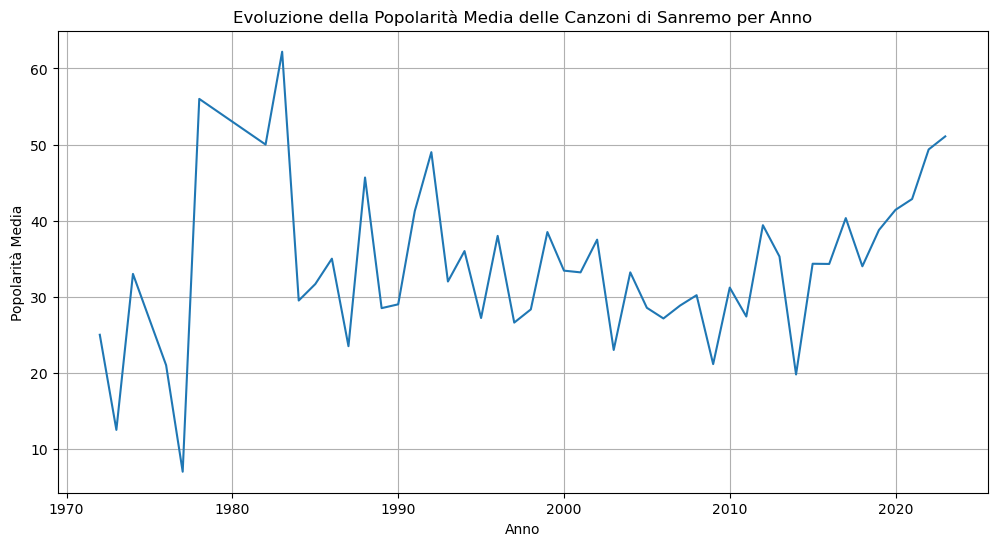

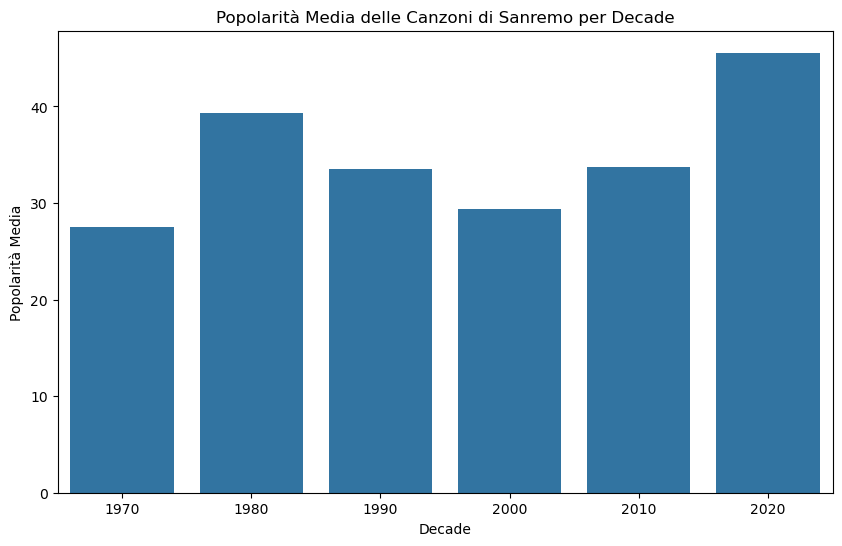

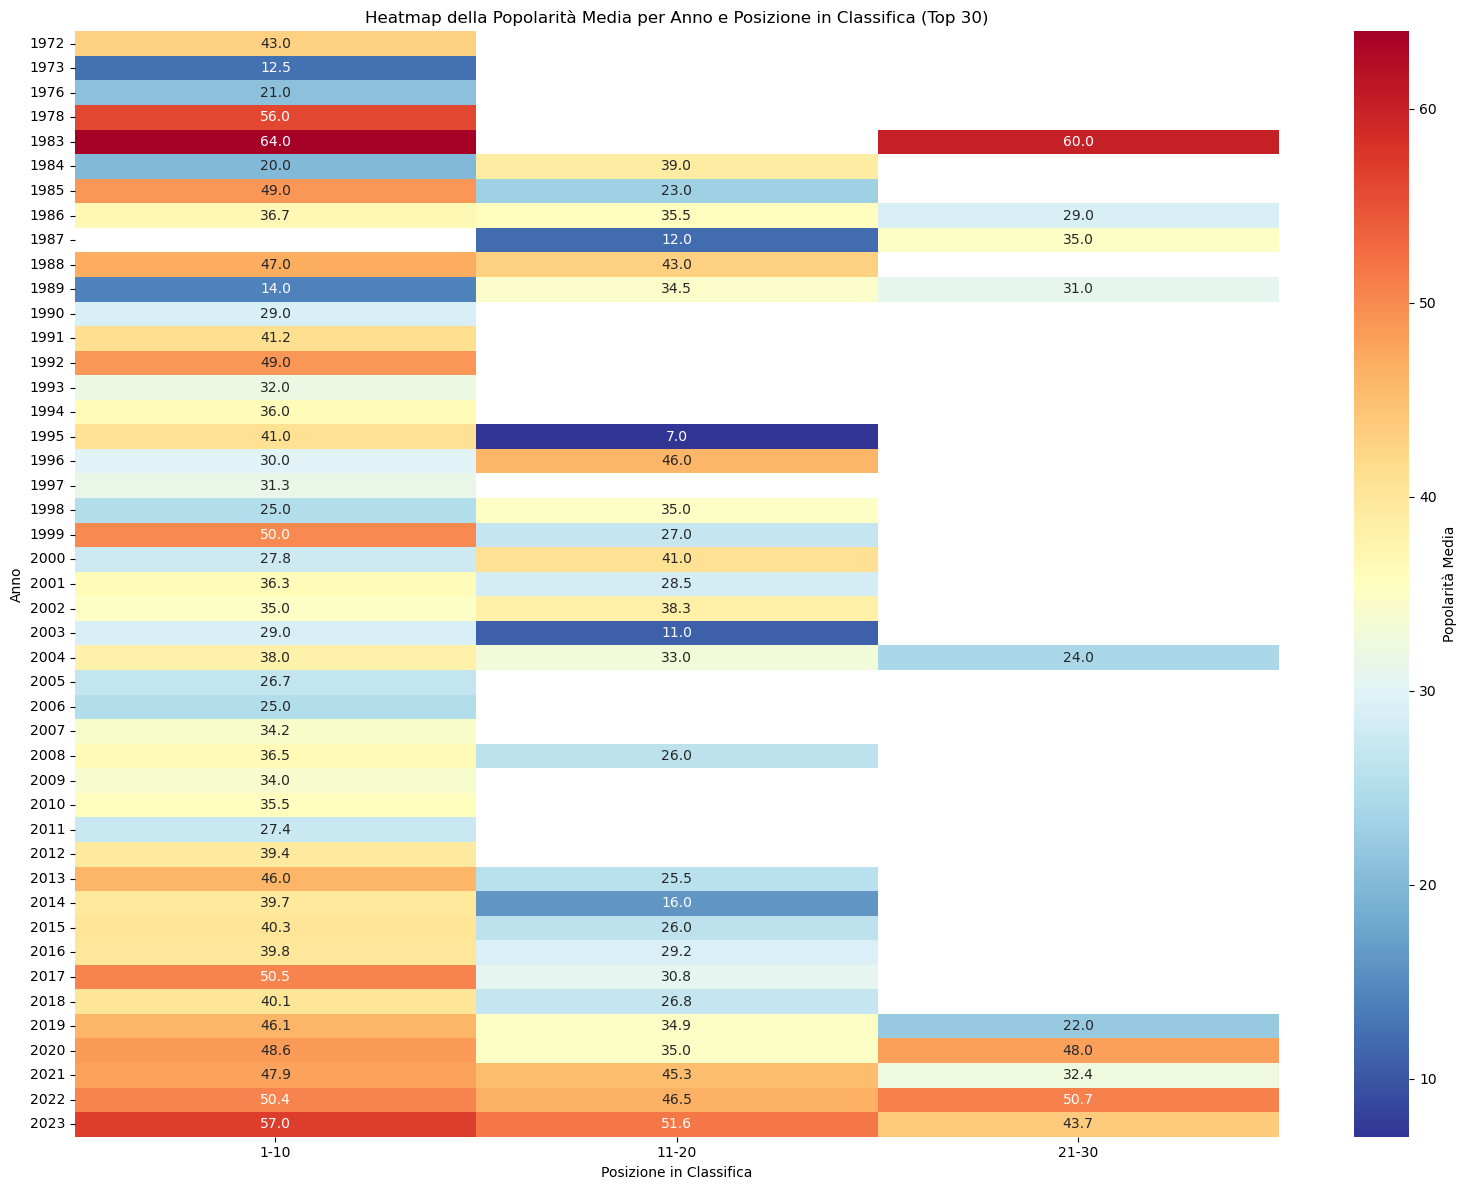

Posizione_Fascia
1-10     155
11-20     91
21-30     18
Name: count, dtype: int64
Posizione_Fascia
1-10      1
11-20    18
21-30    35
dtype: int64


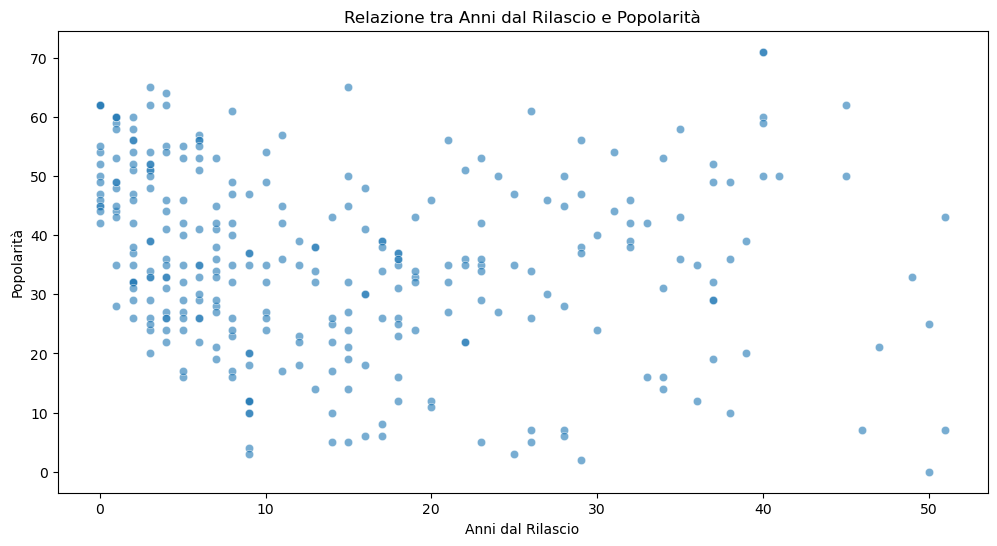

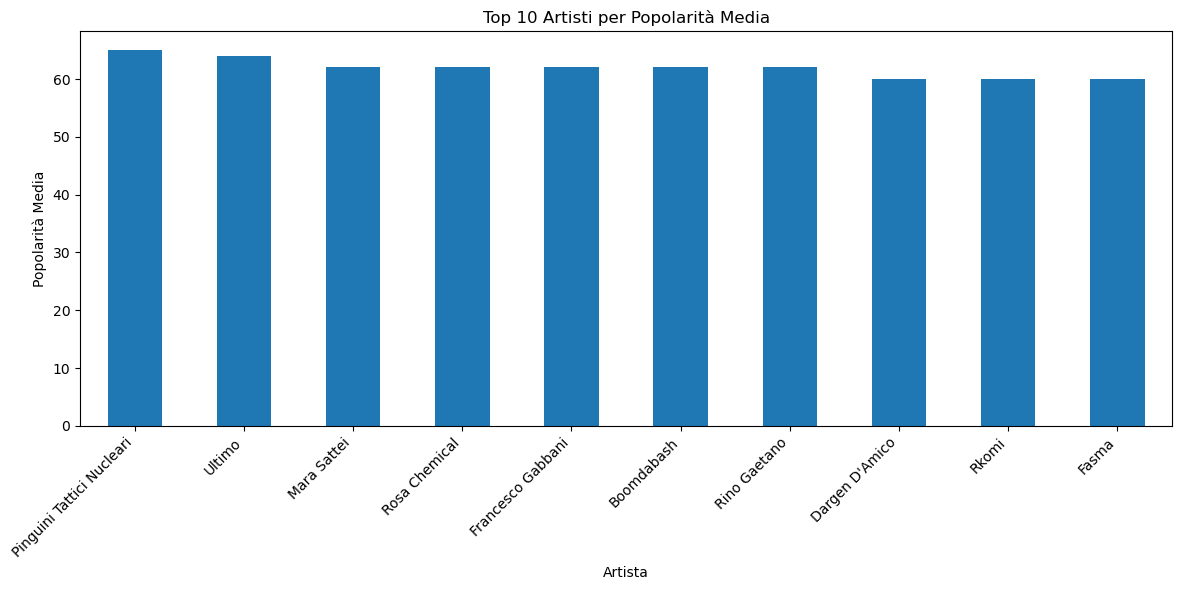

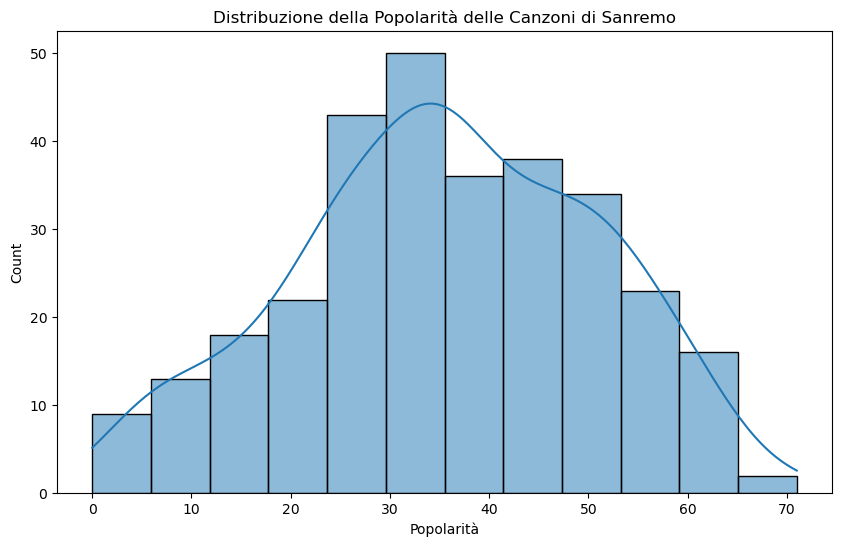

Analisi completata e dati salvati in sanremo_popularity_analysis.csv


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Percorsi dei file Excel
file_path_canzoni = '/Users/michelepinzan/Documents/dati-finalassignment/dati-canzoni-spotify-sanremo-1951-2023.xlsx'
file_path_classifica = '/Users/michelepinzan/Documents/dati-finalassignment/dati-classifica-sanremo-1951-2023.xlsx'
file_path_festival = '/Users/michelepinzan/Documents/dati-finalassignment/dati-festival-sanremo-1951-2023.xlsx'

# Leggo i file Excel
df_canzoni = pd.read_excel(file_path_canzoni)
df_classifica = pd.read_excel(file_path_classifica)
df_festival = pd.read_excel(file_path_festival)

# Mostro le prime righe di ogni dataframe per capirne la struttura dei dati
print("Prime righe di 'dati-canzoni-spotify-sanremo-1951-2023':")
print(df_canzoni.head())
print("\nPrime righe di 'dati-classifica-sanremo-1951-2023':")
print(df_classifica.head())
print("\nPrime righe di 'dati-festival-sanremo-1951-2023':")
print(df_festival.head())

# Pulizia e preparazione dei dataframe
# Rinomino le colonne di 'dati-canzoni-spotify-sanremo-1951-2023' per uniformare i nomi
df_canzoni_clean = df_canzoni.rename(columns={
    'Canzone': 'Canzone',
    'Artista': 'Artista',
    'Anno_ultimo_rilascio': 'Anno',
    'Popolarità': 'Popolarità'
}).drop(columns=['Durata (min)', 'URL immagine album'])  # Rimuovo colonne non necessarie all'analisi

# Rinomino le colonne di 'dati-classifica-sanremo-1951-2023' per uniformare i nomi
df_classifica_clean = df_classifica.rename(columns={
    'Posizione': 'Posizione',
    'Interprete': 'Artista',
    'Canzone': 'Canzone',
    'anno': 'Anno'
}).drop(columns=['Unnamed: 0', 'Autori'])  # Rimuovi colonne non necessarie

# Estraggo la posizione numerica dalla colonna 'Posizione' con l'utilizzo di un'espressione regolare (RegEx)
def extract_position(pos):
    if pd.isnull(pos) or pos == 'NF':
        return None
    match = re.search(r'(\d+)', pos)
    if match:
        return int(match.group(1))
    return None

# Applico la funzione di estrazione della posizione
df_classifica_clean['Posizione'] = df_classifica_clean['Posizione'].apply(extract_position)

# Unisco i dataset sulle colonne 'Canzone', 'Artista' e 'Anno'
df_merged = pd.merge(df_classifica_clean, df_canzoni_clean, on=['Canzone', 'Artista', 'Anno'], how='inner')

# Aggiungo una colonna per la decade
df_merged['Decade'] = (df_merged['Anno'] // 10) * 10

# Creo la colonna 'Posizione_Fascia' e correggo la creazione delle fasce di posizione
df_merged['Posizione_Fascia'] = pd.cut(df_merged['Posizione'], 
                                       bins=[0, 10, 20, 30], 
                                       labels=['1-10', '11-20', '21-30'],
                                       include_lowest=True)

# Controllo sui dati puliti
# 1. Visualizzo le prime righe dei dati puliti
print("\nPrime righe del dataframe unito e pulito:")
print(df_merged.head())

# 2. Controllo i tipi di dati
print("\nTipi di dati delle colonne:")
print(df_merged.dtypes)

# 3. Controllo i valori unici nella colonna 'Posizione'
print("\nValori unici nella colonna 'Posizione':")
print(df_merged['Posizione'].unique())

# 4. Controllo i valori nulli
print("\nControllo dei valori nulli:")
print(df_merged.isnull().sum())

# 5. Aggiungo statistiche descrittive:
print("\nStatistiche descrittive della popolarità:")
print(df_merged['Popolarità'].describe())

# Grafici per l'analisi dell'evoluzione della popolarità nel tempo

# 1. Popolarità media per anno
yearly_popularity = df_merged.groupby('Anno')['Popolarità'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_popularity['Anno'], yearly_popularity['Popolarità'])
plt.title('Evoluzione della Popolarità Media delle Canzoni di Sanremo per Anno')
plt.xlabel('Anno')
plt.ylabel('Popolarità Media')
plt.grid(True)
plt.show()

# 2. Popolarità media per decade
decade_popularity = df_merged.groupby('Decade')['Popolarità'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Popolarità', data=decade_popularity)
plt.title('Popolarità Media delle Canzoni di Sanremo per Decade')
plt.xlabel('Decade')
plt.ylabel('Popolarità Media')
plt.show()

# 3. Heatmap della popolarità per posizione e decade
df_top30 = df_merged[df_merged['Posizione_Fascia'].isin(['1-10', '11-20', '21-30'])] # Filtro il dataframe per includere solo le prime 30 posizioni
grouped_data = df_top30.groupby(['Anno', 'Posizione_Fascia'], observed=False)['Popolarità'].mean().unstack()
grouped_data = grouped_data.sort_index()

plt.figure(figsize=(16, 12))  # Adatto la dimensione per la nuova visualizzazione
sns.heatmap(grouped_data, annot=True, cmap='RdYlBu_r', fmt='.1f', cbar_kws={'label': 'Popolarità Media'})
plt.title('Heatmap della Popolarità Media per Anno e Posizione in Classifica (Top 30)')
plt.xlabel('Posizione in Classifica')
plt.ylabel('Anno')
plt.tight_layout()
plt.show()

# Stampo un riepilogo dei dati per una verifica
print(df_top30['Posizione_Fascia'].value_counts())
print(grouped_data.isna().sum())

# 4. Analisi della longevità: popolarità in base all'anno di rilascio
df_merged['Anni_Dal_Rilascio'] = 2023 - df_merged['Anno']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Anni_Dal_Rilascio', y='Popolarità', data=df_merged, alpha=0.6)
plt.title('Relazione tra Anni dal Rilascio e Popolarità')
plt.xlabel('Anni dal Rilascio')
plt.ylabel('Popolarità')
plt.show()

# 5. Top 10 artisti per popolarità media
top_artists = df_merged.groupby('Artista')['Popolarità'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artisti per Popolarità Media')
plt.xlabel('Artista')
plt.ylabel('Popolarità Media')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Distribuzione della popolarità
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Popolarità'], kde=True)
plt.title('Distribuzione della Popolarità delle Canzoni di Sanremo')
plt.xlabel('Popolarità')
plt.show()

# Salvo il dataframe per l'analisi data storytelling su Looker Studio
df_merged.to_csv('sanremo_popularity_analysis.csv', index=False)
print('Analisi completata e dati salvati in sanremo_popularity_analysis.csv')